In [62]:
# !pip install pydotplus
# !pip install graphviz

In [63]:
import pandas as pd
import numpy as np
import re
import seaborn as sns
import pydotplus
import graphviz
import matplotlib.pyplot as plt

from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

In [64]:
# Reading in storm data
data = pd.read_csv("../data/NOAA_storms.csv", usecols=('Storm_Status', 'Max_Wind', 'Min_Pressure', 'Radius_Max_Wind'))
data.head()

,Storm_Status,Max_Wind,Min_Pressure,Radius_Max_Wind
0,HU,100.0,961.0,10.0
1,HU,100.0,950.0,40.0
2,HU,130.0,934.0,10.0
3,HU,70.0,979.0,45.0
4,HU,100.0,952.0,5.0


In [111]:
# split data
X = data[['Max_Wind', 'Min_Pressure', 'Radius_Max_Wind']]
Y = data["Storm_Status"]

trainX, testX, trainY, testY = train_test_split(X, Y, test_size=.4)
print('training data:',trainX.head(4))
print('testing data:',testX.head(4))

training data:       Max_Wind  Min_Pressure  Radius_Max_Wind
1891      55.0         972.0             40.0
411      105.0         967.0             15.0
258       35.0        1002.0             60.0
1905      40.0         976.0             50.0
testing data:       Max_Wind  Min_Pressure  Radius_Max_Wind
98       115.0         955.0              5.0
379       30.0        1010.0             20.0
37       105.0         955.0             10.0
1356      40.0        1005.0             30.0


In [66]:
# Build tree 1
my_DT = DecisionTreeClassifier()
my_DT = my_DT.fit(trainX, trainY)

my_DT_pred = my_DT.predict(testX)
my_DT_pred

array([' HU', ' HU', ' HU', ' HU', ' HU', ' EX', ' TS', ' TS', ' TD',
       ' EX', ' TD', ' TS', ' LO', ' TS', ' TD', ' DB', ' HU', ' TS',
       ' TS', ' HU', ' EX', ' TD', ' TD', ' HU', ' TS', ' TD', ' HU',
       ' EX', ' LO', ' TS', ' SS', ' EX', ' HU', ' TS', ' HU', ' DB',
       ' HU', ' LO', ' LO', ' HU', ' EX', ' LO', ' DB', ' TS', ' TD',
       ' HU', ' LO', ' HU', ' HU', ' HU', ' HU', ' TS', ' EX', ' HU',
       ' HU', ' HU', ' TS', ' TD', ' HU', ' EX', ' HU', ' LO', ' TD',
       ' HU', ' HU', ' TS', ' HU', ' HU', ' EX', ' HU', ' EX', ' TD',
       ' EX', ' LO', ' HU', ' TS', ' LO', ' TD', ' DB', ' TS', ' TS',
       ' TS', ' SS', ' TS', ' TS', ' HU', ' LO', ' TS', ' HU', ' HU',
       ' TD', ' HU', ' HU', ' TS', ' EX', ' EX', ' HU', ' LO', ' TS',
       ' LO', ' SS', ' HU', ' HU', ' TS', ' TS', ' HU', ' TD', ' TS',
       ' EX', ' TS', ' HU', ' HU', ' TS', ' SS', ' TS', ' HU', ' LO',
       ' TS', ' TD', ' HU', ' TS', ' LO', ' TS', ' LO', ' HU', ' EX',
       ' HU', ' EX',

In [74]:
my_DT.predict_proba(trainX)

array([[0., 0., 1., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       ...,
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [72]:
FeatureNames = trainX.columns.values
ClassNames = my_DT.classes_
print("feature names:",trainX.columns.values)
print("class names:", my_DT.classes_)

feature names: ['Max_Wind' 'Min_Pressure' 'Radius_Max_Wind']
class names: [' DB' ' EX' ' HU' ' LO' ' SD' ' SS' ' TD' ' TS']


In [68]:
print("score is:", round(my_DT.score(testX, testY),3))

score is: 0.826


In [73]:
# Graphing
MyPlot=tree.plot_tree(my_DT,
                   feature_names=FeatureNames,  
                   class_names=ClassNames,
                   filled=True)

plt.savefig("MyTree1.jpg")
plt.close()



In [104]:
# Build tree 2
my_DT2 = DecisionTreeClassifier(criterion = 'entropy', max_leaf_nodes=70)
my_DT2 = my_DT2.fit(trainX, trainY)

my_DT_pred2 = my_DT2.predict(testX)
my_DT_pred2

print("score is:", round(my_DT2.score(testX, testY),3))

MyPlot=tree.plot_tree(my_DT2,
                   feature_names=FeatureNames,  
                   class_names=ClassNames,
                   filled=True)

plt.savefig("MyTree2.jpg")
plt.close()

score is: 0.82


In [109]:
# Build tree 3
my_DT3 = DecisionTreeClassifier(criterion = 'log_loss', min_samples_split=100)
my_DT3 = my_DT3.fit(trainX, trainY)

my_DT_pred3 = my_DT3.predict(testX)
my_DT_pred3

print("score is:", round(my_DT3.score(testX, testY),3))

MyPlot=tree.plot_tree(my_DT3,
                   feature_names=FeatureNames,  
                   class_names=ClassNames,
                   filled=True)

plt.savefig("MyTree3.jpg")
plt.close()

score is: 0.794


[[ 15   0   0   4   0   2   2   2]
 [  3  74   4   8   0   3   3  18]
 [  0   3 239   0   0   0   0   0]
 [  3   5   0  83   1   1   7   5]
 [  0   0   0   1   0   0   1   0]
 [  0   3   0   1   0   5   0   4]
 [  0   6   0  16   0   0  54   0]
 [  3  14   0  10   0  12   0 217]]


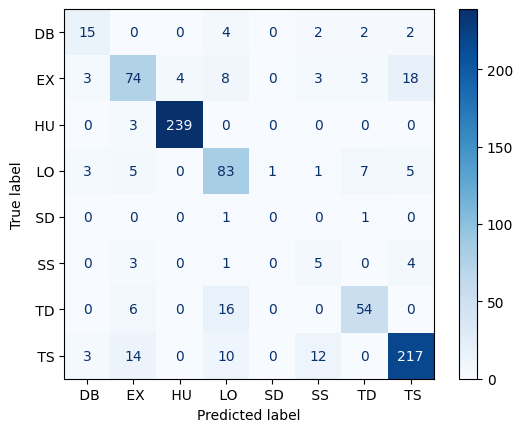

In [110]:
# Confusion matrix for tree1
Confusion = confusion_matrix(testY, my_DT_pred)
print(Confusion)

display = ConfusionMatrixDisplay(confusion_matrix=Confusion, display_labels=ClassNames)
display.plot(cmap='Blues')
plt.show()

[[ 1  4  8  1  0  0  3 11]
 [ 5  9 31 18  0  0  9 41]
 [ 7 32 80 27  0  1 28 76]
 [ 5 15 30 11  0  1  9 33]
 [ 0  0  2  0  0  0  0  0]
 [ 0  2  2  1  0  0  1  6]
 [ 1  7 27  9  0  1  3 25]
 [ 8 32 73 32  0  2 19 83]]


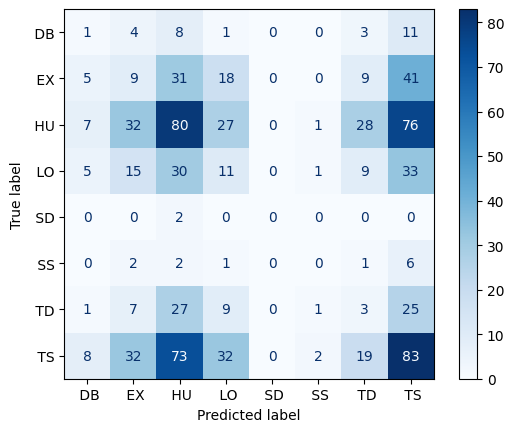

In [115]:
# Confusion matrix for tree2
Confusion = confusion_matrix(testY, my_DT_pred2)
print(Confusion)

display = ConfusionMatrixDisplay(confusion_matrix=Confusion, display_labels=ClassNames)
display.plot(cmap='Blues')
plt.show()

[[ 0  5  8  2  0  0  3 10]
 [ 3 10 31 15  0  0 10 44]
 [ 2 39 80 27  0  0 29 74]
 [ 1 16 30 12  0  0  9 36]
 [ 0  0  2  0  0  0  0  0]
 [ 0  2  2  0  0  0  1  7]
 [ 0  7 27  5  0  0  8 26]
 [ 2 30 73 34  0  0 21 89]]


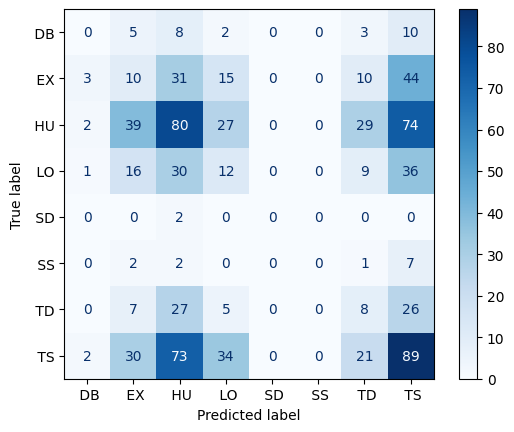

In [113]:
# Confusion matrix for tree3
Confusion = confusion_matrix(testY, my_DT_pred3)
print(Confusion)

display = ConfusionMatrixDisplay(confusion_matrix=Confusion, display_labels=ClassNames)
display.plot(cmap='')
plt.show()